# Checkpoints - Part 1

The first step is to load the two available datasets and make them uniform and clean. The permalink attribute contains a mix of upper and lower cases and so, for uniformity, we convert all of them to lowercase. This is required for counting the number of unique company names in the two tables.

In [1]:
import pandas as pd

#reading companies table
df_companies = pd.read_csv('companies.txt', decimal=",", delimiter="\t", engine='python')
#reading rounds2 table
df_rounds = pd.read_csv('rounds2.csv', encoding = 'ISO-8859-1')

print('Before replacing uppers with lowers')
print(df_rounds.company_permalink[:5])
#converting the permalink column to lower case for uniformity while check for total unique companies
df_rounds['company_permalink'] = df_rounds['company_permalink'].str.lower()
df_companies['permalink'] = df_companies['permalink'].str.lower()
print('After replacing')
print(df_rounds.company_permalink[:5])


Before replacing uppers with lowers
0                    /organization/-fame
1                 /ORGANIZATION/-QOUNTER
2                 /organization/-qounter
3    /ORGANIZATION/-THE-ONE-OF-THEM-INC-
4                  /organization/0-6-com
Name: company_permalink, dtype: object
After replacing
0                    /organization/-fame
1                 /organization/-qounter
2                 /organization/-qounter
3    /organization/-the-one-of-them-inc-
4                  /organization/0-6-com
Name: company_permalink, dtype: object


Next, we need to count the number of unique company names in companies and rounds2 table. They can be found by calculating the number of unique entries in the permalink field of the two tables using the function value_counts (which excludes NA values by default)

In [2]:
#counting number of unique company names
unique_companies = df_companies.permalink.value_counts()
print ('Count of unique companies in the companies table %s' % unique_companies.size)

unique_rounds = df_rounds.company_permalink.value_counts()
print ('Count of unique companies in the rounds2 table %s' % unique_rounds.size)

Count of unique companies in the companies table 66368
Count of unique companies in the rounds2 table 66370


Thus we see that the number of unique company names in rounds2 table is more than companies table

Our next step is to merge the two tables into one. The permalink field can be used for merging as it is the primary key of the companies table and foreign key of rounds2 table. To keep consistency, we will rename the 'permalink' field of the companies table to 'company_permalink' as it is named in rounds2 table.

Furthermore, we will do a inner join as opposed to outer joins. The reason is that, certain companies in rounds2 table for which there is no entry in the companies table is of no use to us. This is because we would not be able to make any decisions from them as we don't know which sector they belong or which country.

In [3]:
#renaming column name permalink to company_permalink of df_companies data frame to facilitate merge uniformity between rounds2 and companies table
df_companies.rename(columns={'permalink': 'company_permalink'}, inplace=True)
print('Column names of the companies table are \n%s' %df_companies.columns)

#merging the rounds data frame with the companies data frame with inner outer join
master_frame = pd.merge(df_rounds, df_companies, how = 'inner', on = 'company_permalink')
print('Count of rows in the master frame %s' % master_frame.shape[0])

print('\nThe Master Data is now:')
master_frame.head(5)

Column names of the companies table are 
Index(['company_permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')
Count of rows in the master frame 114875

The Master Data is now:


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


## Data Cleaning
We also want to clean the data a little more for easier computation later on. We realize that if a row has null in the raised_amount_usd it is of no use, since our decisions are based on the amount of investments that companies have received. Similarly, if the category list is empty, we cannot draw insight about which sector the investment belongs to. So, as part of data cleaning, we will remove rows which have missing values in the raised_amount_usd field or the category_list field.

We will also save the dataframe for further use.

In [4]:
count_amount_raised_null = master_frame.raised_amount_usd.isnull().sum()
count_category_list_null = master_frame.category_list.isnull().sum()
print('Count of nulls in the raised_amount_usd field %s' %count_amount_raised_null)
print('Count of nulls in the category_list field %s' %count_category_list_null)
print('Count of rows before cleaning the data %s'% master_frame.shape[0])
master_frame = master_frame[~pd.isnull(master_frame['raised_amount_usd'])]
master_frame = master_frame[~pd.isnull(master_frame['category_list'])]
print('Count of rows after cleaning the data %s'% master_frame.shape[0])
count_amount_raised_null = master_frame.raised_amount_usd.isnull().sum()
print('Count of nulls in the raised_amount_usd field after cleaning the data %s' %count_amount_raised_null)
#saving the dataframe in a csv file 
master_frame.to_csv('master_data.csv', sep=',')

Count of nulls in the raised_amount_usd field 19960
Count of nulls in the category_list field 3387
Count of rows before cleaning the data 114875
Count of rows after cleaning the data 93877
Count of nulls in the raised_amount_usd field after cleaning the data 0


# Checkpoint 2: Funding Type Analysis

We find the most suitable fund type for Spark Funds by analyzing the measures of central tendency.

In [5]:
grp = master_frame.groupby('funding_round_type')['raised_amount_usd'].median()
median_seed = grp['seed']
median_angel = grp['angel']
median_venture = grp['venture']
median_pvt_eq = grp['private_equity']

grp = master_frame.groupby('funding_round_type')['raised_amount_usd'].quantile([0.25])
lower_quantile_seed = grp['seed']
lower_quantile_angel = grp['angel']
lower_quantile_venture = grp['venture']
lower_quantile_pvt_eq = grp['private_equity']

grp = master_frame.groupby('funding_round_type')['raised_amount_usd'].quantile([0.75])
upper_quantile_seed = grp['seed']
upper_quantile_angel = grp['angel']
upper_quantile_venture = grp['venture']
upper_quantile_pvt_eq = grp['private_equity']

grp = master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()
mean_seed = grp['seed']
mean_angel = grp['angel']
mean_venture = grp['venture']
mean_pvt_eq = grp['private_equity']

data = [[mean_seed, lower_quantile_seed, median_seed, upper_quantile_seed],
        [mean_angel, lower_quantile_angel, median_angel, upper_quantile_angel],
        [mean_venture, lower_quantile_venture, median_venture, upper_quantile_venture],
        [mean_pvt_eq, lower_quantile_pvt_eq, median_pvt_eq, upper_quantile_pvt_eq]]

result_df = pd.DataFrame(data,columns=['Mean', 'Lower_Quantile', 'Median', 'Upper_Quantile'],dtype=float,index=['seed','angel','venture','private_equity'])
print(result_df.to_string())

                        Mean  Lower_Quantile      Median  Upper_Quantile
seed            7.192209e+05         55000.0    277877.5       1000000.0
angel           9.574461e+05        150000.0    400000.0       1000000.0
venture         1.171726e+07       1600000.0   5000000.0      12000000.0
private_equity  7.341846e+07       5000000.0  20000000.0      75000000.0


Since Spark Funds want to invest between 5 to 15 million USD, Venture fund is the best suited. Its mean is 11.7 million USD and median is 5 million USD. Its quartiles, which indicates where most investors invests, are between 1.6 to 12 million that fits the requirement of Spark Funds.

# Checkpoint 3: Country analysis
For this step, we first need to extract the rows that correspond to the Venture fund type that we have shortlisted in the previous step. Now, to find the total investment in each country, we will use the group the data by countries and then use the sum() function on each group.

To find the top nine countries which are most invested, we will sort the list of countries in descending order.

In [6]:
#extracting the venture fund types
master_frame = master_frame[master_frame.funding_round_type == 'venture']
#calculating total investment for each country
countries = master_frame.groupby('country_code')['raised_amount_usd'].sum()
#sort the countries in the order of investment
countries.sort_values(ascending=False,inplace=True)
topNineCountries = countries[:9]
print("Top nine countries based on total investment\n %s" % topNineCountries)

Top nine countries based on total investment
 country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.208457e+09
ISR    6.854350e+09
DEU    6.305522e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64


By looking up the list of countries whose official language is English, we can conclude that the top three countries with the largest investment and speak English are USA, GBR, IND. They are the most suitable countries for investment for Spark Funds.

# Checkpoint 4: Sector Analysis 1

As part of this task, we need to map every sub category to a main sector using the mapping.csv file. The mapping.csv file however has a problem. Some of the category names like 'Analytics' are misentered as A0lytics. Essentially the file has 'na' in the category names replaced by a '0'. So, we need to fix this problem.

Additionally, the first line in the mapping file maps a null category to a blank main category. This row is of no use in the analysis and so we filter it out.

In [7]:
import re
map_df = pd.read_csv('mapping.csv')
#filtering the first empty row
map_df = map_df[~pd.isnull(map_df['category_list'])]
#replace 0 in the beginning of a word with 'Na'
map_df['category_list'] = map_df['category_list'].apply(lambda category: re.sub('^0','Na',category))
#replace all other 0s in words with 'na'
map_df['category_list'] = map_df['category_list'].apply(lambda category: re.sub('0','na',category))
map_df.to_csv('mapping_modified.csv', sep=',')
map_df.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1
10,Advertising Exchanges,0,0,0,0,0,0,0,0,1


To map sub categories to a main sector, we will take the help of a function. The function will extract the first category from a list of categories separated by the pipe symbol (|). It will then find a corresponding Main sector from the mapping dataframe map_df and return it.

This function will hence be suitable to create a column that maps the sub categories of the master_frame table to their main sectors.

Assumption: There are certain sub categories like 'Self Development' and 'Cause Marketing' which does not map to any of the main sectors provided in the mapping.csv file. For these categories, we simply make the sub category as the main sector.

We update the master_data.csv file with the new data frame containing an extra column titled main_sector containing the main sector where the investment is made.

Note, for faster perfomance we have used caching. The way this is done is, when we find a mapping between a primary category and a main sector we update it in a python dictionary. Later, if the same look up of primary category is requested we obtain it from the dictionary rather than searching for it in the huge mapping.csv dataframe. The run time comes down from 27 seconds to less than a second with this minor improvement.

In [8]:
# The dictionary will be used for caching the primary category to main sector mappings
cache_mapping = {}

def fetchMainSector(arg):
    global map_df
    global cache_mapping
    # split on the | symbol and take the first category. This will be the primary category for lookup in the mapping file
    primary_category = arg.split('|')[0]
    # if the mapping is present in the cache obtain it in quickly from the cache
    if(primary_category in cache_mapping):
        return cache_mapping[primary_category]
    # if not present, we need to look up the map_df dataframe to find the main sector corresponding to a primary category
    try:
        # iterate the row of the primary_category in the mapping dataframe and find the column which has a 1. This column will be the main sector
        row = map_df.loc[primary_category,:]
        for i in map_df.columns:
            if(row[i] == 1):
                # The mapping should be added to the cache for fast look up later.
                cache_mapping[primary_category] = i
                return i
    except KeyError:
        # in case there is no mapping for the sub category, make the sub category the main sector
        return primary_category

#setting the category list as index helps us to quickly access the row corresponding to a particular product category
map_df = map_df.set_index('category_list')
master_frame['main_sector'] = master_frame['category_list'].apply(fetchMainSector)
#saving this dataframe in a file
master_frame.to_csv('master_data_venture.csv', sep=',')
master_frame.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,"News, Search and Messaging"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,"News, Search and Messaging"
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Cleantech / Semiconductors
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising"


# Checkpoint 5: Sector Analysis 2

This section would target to find the most heavily invested sectors in the top three countries. Here, we make an assumption. There are a lot of companies that are presently closed. The data of these companies would not portray the present investment market accurately. So, in this step we drop all the rows for companies which are closed.

In [9]:
master_frame = master_frame[master_frame.status != 'closed']
master_frame.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,"News, Search and Messaging"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,"News, Search and Messaging"


Next, we divide the master_frame among the top 3 countries - USA, GBR, IND. We keep only those investment amounts between 5 to 15 million USD as per the requirement of Spark Funds.

In [10]:
d1 = master_frame[(master_frame.country_code == 'USA') & (master_frame.funding_round_type == 'venture') & (master_frame.raised_amount_usd>=5000000) & (master_frame.raised_amount_usd<=15000000)]
d2 = master_frame[(master_frame.country_code == 'GBR') & (master_frame.funding_round_type == 'venture') & (master_frame.raised_amount_usd>=5000000) & (master_frame.raised_amount_usd<=15000000)]
d3 = master_frame[(master_frame.country_code == 'IND') & (master_frame.funding_round_type == 'venture') & (master_frame.raised_amount_usd>=5000000) & (master_frame.raised_amount_usd<=15000000)]

Two more columns need to be added to d1, d2, and d3. The first column would contain the total amount of investment of each main sector. The second column would contain the number of investments in each main sector.

To compute the two columns, we will group the data based on the main sectors. For each sector, we will count the number of investments in that sector and the total investment in that sector using the field raised_amount_usd.

Finally, we will map each main sector to the count of investment in that sector and total investment in that sector using the apply function of pandas.

In [11]:
# for suppressing a warning
pd.options.mode.chained_assignment = None

# Mapping each main sector to the number of investment in that sector in a newly created column called count_of_investment
d1['count_of_investment'] = d1.groupby('main_sector')['raised_amount_usd'].transform('count')
d2['count_of_investment'] = d2.groupby('main_sector')['raised_amount_usd'].transform('count')
d3['count_of_investment'] = d3.groupby('main_sector')['raised_amount_usd'].transform('count')

# Mapping each main sector to the total investment in that sector in a newly created column called total_investment
d1['total_investment'] = d1.groupby('main_sector')['raised_amount_usd'].transform('sum')
d2['total_investment'] = d2.groupby('main_sector')['raised_amount_usd'].transform('sum')
d3['total_investment'] = d3.groupby('main_sector')['raised_amount_usd'].transform('sum')

# saving the 3 data frames locally for easier access later
d1.to_csv('master_data_usa.csv', sep=',')
d2.to_csv('master_data_gbr.csv', sep=',')
d3.to_csv('master_data_ind.csv', sep=',')

In [12]:
#displaying d3 (investments in IND)
d1.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector,count_of_investment,total_investment
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising",2590,2.283077e+10
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,"News, Search and Messaging",1465,1.298891e+10
102,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,Others,2758,2.463670e+10
109,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,739,6.700079e+09
110,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,739,6.700079e+09
111,/organization/1366-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,5150000.0,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,739,6.700079e+09
112,/organization/1366-technologies,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,A,27-03-2008,12400000.0,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,739,6.700079e+09
113,/organization/1366-technologies,/funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9,venture,B,16-12-2010,6000000.0,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,739,6.700079e+09
133,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,A,16-04-2002,14000000.0,170 Systems,http://www.170systems.com,Software,acquired,USA,MA,Boston,Bedford,01-01-1990,Others,2758,2.463670e+10
139,/organization/17zuoye,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,A,01-01-2011,5000000.0,17zuoye,http://www.17zuoye.com/,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,01-01-2007,Others,2758,2.463670e+10


Next would be to compute certain measures that are required for the analysis.
1. Number of investment in the top 3 countries - USA, GBR, IND
2. Total investment in these 3 countries

1 and 2 can be calculated by analyzing the raised_amount_usd field. The count of entries in this field for a country specific dataframe indicates the total number of investment in that country. Similarly, the sum of all entries of that field would indicate the total amount invested in that country.

In [13]:
count_of_investment_usa = d1['raised_amount_usd'].count()
total_investment_usa = d1['raised_amount_usd'].sum()

count_of_investment_gbr = d2['raised_amount_usd'].count()
total_investment_gbr = d2['raised_amount_usd'].sum()

count_of_investment_ind = d3['raised_amount_usd'].count()
total_investment_ind = d3['raised_amount_usd'].sum()

print('Count of investment in USA %s' %count_of_investment_usa)
print('total amount of investment in USA %s' %total_investment_usa)

print('Count of investment in GBR %s' %count_of_investment_gbr)
print('total amount of investment in GBR %s' %total_investment_gbr)

print('Count of investment in IND %s' %count_of_investment_ind)
print('total amount of investment in IND %s' %total_investment_ind)

Count of investment in USA 11287
total amount of investment in USA 101010153708.0
Count of investment in GBR 582
total amount of investment in GBR 5053293406.0
Count of investment in IND 315
total amount of investment in IND 2820673602.0


3. Top 3 sectors based on count of investment
4. Top 2 companies of the top 2 sectors based on the amount of funding they received

For calculating 3, we will sort the tables d1, d2, d3 on the basis of count of investment in descending order. For calculating 4, we will sort the companies with the same investment count on the basis of the amount of funding.

In [14]:
d1.sort_values(['count_of_investment','raised_amount_usd'], ascending = [False, False], inplace = True)
d2.sort_values(['count_of_investment','raised_amount_usd'], ascending = [False, False], inplace = True)
d3.sort_values(['count_of_investment','raised_amount_usd'], ascending = [False, False], inplace = True)

If we analyze these dataframes now, the top sector, based on the count of investment, is at index 0. The sectors second and third in the count of investment can be found by listing the main_sector column which is now sorted correctly in the descending order of count of investment.

Note, we need to use 'unique' while listing the main_sector because there will be many rows (or investments) for each sector.

In [15]:
# display the sorted series for further analysis
print('Unique main product categories in USA\n %s\n' %d1.main_sector.unique())
print('Count of investment value for those categories in USA\n %s\n' %d1.count_of_investment.unique())
print('Unique main product categories in GBR\n %s\n' %d2.main_sector.unique())
print('Count of investment value for those categories in GBR\n %s\n' %d2.count_of_investment.unique())
print('Unique main product categories in IND\n %s\n' %d3.main_sector.unique())
print('Count of investment value for those categories in IND\n %s\n' %d3.count_of_investment.unique())

Unique main product categories in USA
 ['Others' 'Social, Finance, Analytics, Advertising'
 'Cleantech / Semiconductors' 'News, Search and Messaging' 'Health'
 'Manufacturing' 'Entertainment' 'Automotive & Sports'
 'Biotechnology and Semiconductor']

Count of investment value for those categories in USA
 [2758 2590 2192 1465  854  739  531  157    1]

Unique main product categories in GBR
 ['Others' 'Social, Finance, Analytics, Advertising'
 'Cleantech / Semiconductors' 'News, Search and Messaging' 'Entertainment'
 'Manufacturing' 'Health' 'Automotive & Sports']

Count of investment value for those categories in GBR
 [140 128 116  66  53  40  23  16]

Unique main product categories in IND
 ['Others' 'Social, Finance, Analytics, Advertising'
 'News, Search and Messaging' 'Entertainment' 'Manufacturing'
 'Cleantech / Semiconductors' 'Health' 'Automotive & Sports']

Count of investment value for those categories in IND
 [103  59  49  32  21  20  18  13]



We can see that the main sectors : 'Others', and 'Social, Finance, Analytics, Advertising' are the top 2 sectors in all the 3 countries. In USA, and GBR the third top sector is 'Cleantech / Semiconductors', while in IND the third top sector is 'News, Search and Messaging'.

For each sector, the number of investments can be seen in the list just below the list of sectors. For example, the total number of investments in the Others sector is 2758 and the Cleantech / Semiconductors is 2192 in USA.

Now we are left with calculating 4. At this point we are aware of the top 2 sectors of each country. To find the top companies in these sectors, we select those sectors and get the company's name from the 'name' column. Since the list of companies are already sorted in the descending order of the amount of funding they received, the company which received the largest amount of funding in a given sector is at index 0.

In [16]:
print('The top company of Others sector in USA is %s' %d1.loc[d1.main_sector == 'Others','name'].values[0])
print('The top company of Social, Finance, Analytics, Advertising sector in USA is %s' %d1.loc[d1.main_sector == 'Social, Finance, Analytics, Advertising','name'].values[0])
print('The top company of Others sector in GBR is %s' %d2.loc[d2.main_sector == 'Others','name'].values[0])
print('The top company of Social, Finance, Analytics, Advertising sector in GBR is %s' %d2.loc[d2.main_sector == 'Social, Finance, Analytics, Advertising','name'].values[0])
print('The top company of Others sector in IND is %s' %d3.loc[d3.main_sector == 'Others','name'].values[0])
print('The top company of Social, Finance, Analytics, Advertising sector in IND is %s' %d3.loc[d3.main_sector == 'Social, Finance, Analytics, Advertising','name'].values[0])

The top company of Others sector in USA is 1stdibs
The top company of Social, Finance, Analytics, Advertising sector in USA is Admeld
The top company of Others sector in GBR is Azure Solutions
The top company of Social, Finance, Analytics, Advertising sector in GBR is myThings
The top company of Others sector in IND is CaratLane
The top company of Social, Finance, Analytics, Advertising sector in IND is ApnaPaisa



# Checkpoint 6: Plots

## Plot 1

A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type.

We will show the fraction of total investment in each fund type use a pie chart and the average amount of investment in each fund type using a bar chart. Furthermore, we will divide a single plot into two sub plots that will contain the two charts. 

Total investment in all fund types 978906901303.0
Fraction of total investment in Seed Fund 0.017133631945668047
Fraction of total investment in Venture Fund 0.5951231984385384
Fraction of total investment in Private Equity Fund 0.14280086102154402
Fraction of total investment in other funds 0.24494230859424948
funding_round_type
seed              7.192209e+05
venture           1.171726e+07
private_equity    7.341846e+07
Name: raised_amount_usd, dtype: float64


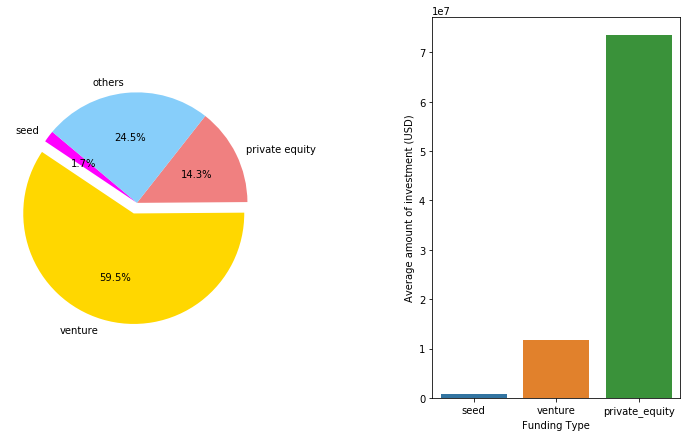

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

master_frame = pd.read_csv('master_data.csv', encoding = 'unicode_escape')

# To find the fraction of investment in each fund type, we will divide the total investment in that fund type by the total investment in all fund types
total_investment_all = master_frame['raised_amount_usd'].sum()
print('Total investment in all fund types %s' % total_investment_all)

# Compute the total investment in seed fund
total_seed = master_frame[master_frame.funding_round_type == 'seed']['raised_amount_usd'].sum()
seed_fraction = total_seed/total_investment_all
print('Fraction of total investment in Seed Fund %s' % seed_fraction)

# Compute the total investment in venture fund
total_venture = master_frame[master_frame.funding_round_type == 'venture']['raised_amount_usd'].sum()
venture_fraction = total_venture/total_investment_all
print('Fraction of total investment in Venture Fund %s' % venture_fraction)

# Compute the total investment in private equity
total_pvt_eq = master_frame[master_frame.funding_round_type == 'private_equity']['raised_amount_usd'].sum()
pvt_eq_fraction = total_pvt_eq/total_investment_all
print('Fraction of total investment in Private Equity Fund %s' % pvt_eq_fraction)

# Compute the total investment in all the remaining fund types
other_funds_fraction = 1 - (seed_fraction + venture_fraction + pvt_eq_fraction)
print('Fraction of total investment in other funds %s' % other_funds_fraction)

# Create the subplots - 1 row, 2 columns
fig1, axes = plt.subplots(1,2)
plt.subplots_adjust(wspace = 0.7)
# Adjust the height and width for aesthetics 
fig1.set_figheight(7)
fig1.set_figwidth(12)

# set the labels for the pie chart
labels = ['seed', 'venture', 'private equity', 'others']
# set the pie chart fractions
sizes = [seed_fraction, venture_fraction, pvt_eq_fraction, other_funds_fraction]
# set the pie chart colours
colors = ['magenta', 'gold', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0, 0)
# Plot it on the first subplot
axes[0].pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=140)
# Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].axis('equal')

# Next, we will plot the bar chart indicating the average amount of investment of each fund type
# We will group the data by fund types and for each fund type we will find their average investment
grp_means = master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()
grp_means = grp_means[['seed','venture','private_equity']]
print(grp_means)
# plot the bar chart on the second subplot
ax = sns.barplot(grp_means.index,grp_means.values, ax=axes[1])
# set the x-axis and y-axis labels
ax.set(xlabel = 'Funding Type', ylabel = 'Average amount of investment (USD)')
plt.show()

The pie chart indicates that about 60% of investments globally go to the Venture funds. The bar chart shows that the average investment in venture funds is about 11.7 millions USD. This suits the requirement of Spark Funds, that is the amount of investment should be between 5 to 15 million USD.

## Plot 2

A plot showing the top 9 countries against the total amount of investments in Venture

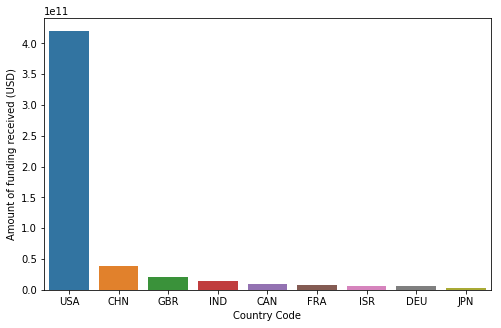

In [18]:
plt.figure(figsize=(8,5))
ax = sns.barplot(topNineCountries.index,topNineCountries.values)
ax.set(xlabel = 'Country Code', ylabel = 'Amount of funding received (USD)')
plt.show()

Among the top 9, USA, GBR, and IND are the top 3 countries whose official language is English

## Plot 3

A plot showing the number of investments in the top 3 sectors of the top 3 countries.

To create this plot we use the dataframes d1, d2, d3 that we created earlier. They represent investments in Venture between 5 to 15 million USD in the top 3 countries USA, GBR and IND. Since we are interested in the top 3 sectors we filter out the other sectors using the count_of_investment field, keeping a cutoff equal to the value of the third largest sector of a country. We had already calculated these values in the previous steps. The values are 2192 for USA whose third largest sector is Cleantech / Semiconductors, 116 for GBR whose third largest sector is also Cleantech / Semiconductors and 49 for IND whose third largest sector is News, Search and Messaging respectively.

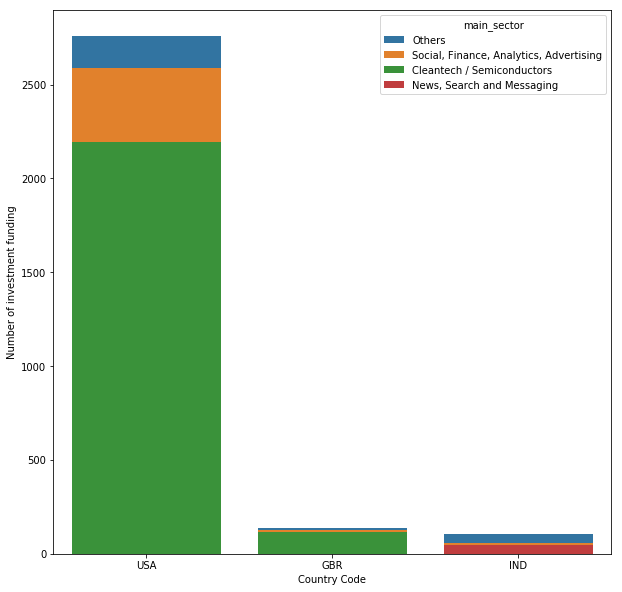

In [19]:
# set the cutoffs based on the value of the 'count_of_investment' field of the third largest sector of each country
third_largest_investment_count_usa = 2192
third_largest_investment_count_gbr = 116
third_largest_investment_count_ind = 49
# keep only the top three sectors in each dataframe
d1 = d1[(d1.count_of_investment >= third_largest_investment_count_usa)]
d2 = d2[(d2.count_of_investment >= third_largest_investment_count_gbr)]
d3 = d3[(d3.count_of_investment >= third_largest_investment_count_ind)]
# stack the dataframes one on top of other so that we can create a single plot for all the three countries
combined_df = pd.concat([d1, d2, d3])
# set the figure size for clarity in reading the plot
plt.figure(figsize=(10,10))
ax = sns.barplot(x='country_code', y='raised_amount_usd', hue='main_sector', data=combined_df, estimator=len, dodge=False)
ax.set(xlabel = 'Country Code', ylabel = 'Number of investment funding')
plt.show()

From the above plot, we can conclude the following:
1. The number of investments in USA is much higher than in GBR and IND. However, the count of investments in GBR is not significantly more than IND
2. In USA, the difference between the second and the third largest sector in terms of the number of investments they received is more than double the difference between the largest and the second largest sectors.
3. In GBR, all the top three sectors have received similar number of investments and are almost equally favourable options for investment for Spark Funds.
4. In IND, the second and the third largest sectors have received almost the same number of investments. However, the top sector in IND has received nearly 75% more investments than the second largest sector.